<a href="https://colab.research.google.com/github/jirvingphd/bs_ds/blob/master/EDA_with_bs_ds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# install on the web using !pip install command
!pip install --upgrade bs_ds;

In [2]:
# Best way to import package 
from bs_ds import * # this will import pandas, numpy, matplotib, seaborn for you. 

View our documentation at https://bs-ds.readthedocs.io/en/latest/bs_ds.html
Recommended import method:
>> from bs_ds import *

Modules Displayed in Table Imported to Use
(Available if used from bs_ds import *)



,Module/Package Handle
pandas,pd
numpy,np
matplotlib,mpl
matplotlib.pyplot,plt
seaborn,sns


## Convenience  / Display Settings 
- big_pandas()
    - reset_pandas()
- ignore_warnings()
    - reset_warnings()
    
- list2df(list_with_header_row)
    - turns  a list of results with a header row into a df
    - each row in the list must be a list of results
    ```python
        res_list = ['Header','Column','Names']
        res_list.append([val1,val2,val3])
        df = list2df(res_list)  # to just display output, list2df(df)
        ``` 

In [3]:
# Use big_pandas to display all rows and columns in dataframes
big_pandas()

# To reset pandas display setings use reset_pandas()
# reset_pandas()

# To turn off all deprecation and future warnings
ignore_warnings()

# To reset warnings to default
#reset_warnings()

display.max_columns=None
display.expand_frame_repr=False
display.max_rows=None
display.precision=4


## Import Data  
- FYI, Pandas can read_csv directly from a URL.

In [4]:
import pandas as pd
# Import data from data csv, columns labels and short hand names from vars.csv
url_data = "https://www.dropbox.com/s/qa0yix5navxubps/GSS_data_utf8.csv?raw=1"
url_vars = "https://www.dropbox.com/s/b1dtw6x0th9y0ag/GSS_vars_utf8.csv?raw=1"
# url_codes = "https://www.dropbox.com/s/b5ybrjak0gi9thn/GSS_codes_utf8.csv?raw=1"

df_data =  pd.read_csv(url_data,encoding='utf-8')
df_vars =  pd.read_csv(url_vars,encoding='utf-8')
# df_codes =  pd.read_csv(url_codes,encoding='utf-8')
# df_vars = pd.read_excel(url_zod_excel,encoding='latin1', sheet_name='Variables')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# Replacing question labels with short-names
df_data.columns=df_vars.Name
df = df_data.drop('cosei10',axis=1).copy()
df.head()

Name,condom,sexfreq,pikupsex,partners,relpersn,attend,size,region,sexornt,isco88,spisco88,coisco08,cofund,spisco08,isco08,sei10,ballot,zodiac,cohort,rincome,major2,marital,indus10,occ10,wrkgovt,hrs2,hrs1,wrkstat,id_,martype,divorce,widowed,major1,educ,age,childs,sibs,sphrs2,sphrs1,spwrksta,year
0,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Once a year,72.0,E. nor. central,Not applicable,3416,Not applicable,Not applicable,Not applicable,Not applicable,3323,50.0,Not applicable,Not applicable,1949,Not applicable,Not applicable,Never married,Clothing stores,"Wholesale and retail buyers, except farm products",Not applicable,Not applicable,Not applicable,Working fulltime,1.0,Not applicable,Not applicable,Not applicable,Not applicable,16,23,0,3,Not applicable,Not applicable,Not applicable,1972.0
1,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Every week,72.0,E. nor. central,Not applicable,7510,Not applicable,Not applicable,Not applicable,Not applicable,3122,46.5,Not applicable,Not applicable,1902,Not applicable,Not applicable,Married,Newspaper publishers,First-line supervisors of production and opera...,Not applicable,Not applicable,Not applicable,Retired,2.0,Not applicable,No,Not applicable,Not applicable,10,70,5,4,Not applicable,Not applicable,Keeping house,1972.0
2,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Once a month,72.0,E. nor. central,Not applicable,3413,1319,Not applicable,Not applicable,3334,3334,56.9,Not applicable,Not applicable,1924,Not applicable,Not applicable,Married,Real estate,Real estate brokers and sales agents,Not applicable,Not applicable,Not applicable,Working parttime,3.0,Not applicable,No,Not applicable,Not applicable,12,48,4,5,Not applicable,Not applicable,Working fulltime,1972.0
3,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Never,72.0,E. nor. central,Not applicable,2411,2411,Not applicable,Not applicable,3352,2411,76.3,Not applicable,Not applicable,1945,Not applicable,Not applicable,Married,Clothing stores,Accountants and auditors,Not applicable,Not applicable,Not applicable,Working fulltime,4.0,Not applicable,No,Not applicable,Not applicable,17,27,0,5,Not applicable,Not applicable,Working fulltime,1972.0
4,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Never,72.0,E. nor. central,Not applicable,4223,8122,Not applicable,Not applicable,8121,4223,31.9,Not applicable,Not applicable,1911,Not applicable,Not applicable,Married,Wired telecommunications carriers,Telephone operators,Not applicable,Not applicable,Not applicable,Keeping house,5.0,Not applicable,No,Not applicable,Not applicable,12,61,2,2,Not applicable,Not applicable,Temp not working,1972.0


## Initial Inspection of data
- **inspect_df**(df,verbose=False)
    - Default: 
        - df.info(), df.describe(). df.head()
    - if inspect_df(df,verbose=True):
        - Also runs check_numeric and check_null
        
        
- **check_numeric**(df, columns=None, unique_check=True, return_list=False):
    -  Check "object" dataframe columns for numeric values and displays report
    
- **check_null**(df, columns=None)

- **check_column**(df/series, columns=None,nlargest='all'):

### Merging DataFrames / Checking For Data Columns
- **check_df_for_columns**(df, columns=None)
    - Checks all columns for columns provided
- **compare_duplicates**

### Dropping Columns If they Include a Specific String
- **drop_cols**(df, list_of_strings_or_regexp)

In [6]:
inspect_df(df,verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64816 entries, 0 to 64815
Data columns (total 41 columns):
condom      64815 non-null object
sexfreq     64814 non-null object
pikupsex    64814 non-null object
partners    64814 non-null object
relpersn    64814 non-null object
attend      64814 non-null object
size        64814 non-null float64
region      64814 non-null object
sexornt     64814 non-null object
isco88      64814 non-null object
spisco88    64814 non-null object
coisco08    64814 non-null object
cofund      64814 non-null object
spisco08    64814 non-null object
isco08      64814 non-null object
sei10       64814 non-null float64
ballot      64814 non-null object
zodiac      64814 non-null object
cohort      64814 non-null object
rincome     64814 non-null object
major2      64814 non-null object
marital     64814 non-null object
indus10     64814 non-null object
occ10       64814 non-null object
wrkgovt     64814 non-null object
hrs2        64814 non-null object
hrs1 

None

Name,size,sei10,id_,year
count,64814.0000,64814.0000,64814.0000,64814.0000
mean,377.1089,40.5904,1151.8102,1994.9392
std,1268.7651,24.0535,828.0302,13.4654
min,0.0000,-1.0000,1.0000,1972.0000
25%,6.0000,23.7000,507.0000,1984.0000
50%,25.0000,38.3000,1029.5000,1996.0000
75%,114.0000,59.1000,1570.0000,2006.0000
max,8175.0000,93.7000,4510.0000,2018.0000


# of Identified Numeric Values in "Object" columns:



,Numeric values,Total Values,Percent
Column,,,
isco88,60912,64816,93.98
spisco88,31855,64816,49.15
coisco08,796,64816,1.23
spisco08,31297,64816,48.29
isco08,60049,64816,92.65
cohort,64586,64816,99.65
major2,2,64816,0.00
indus10,1,64816,0.00
occ10,10,64816,0.02


# of Identified Null Values in "Object" columns:



,Null values,Total Values,Percent
Column,,,
condom,1,64816,0.002
sexfreq,2,64816,0.003
pikupsex,2,64816,0.003
partners,2,64816,0.003
relpersn,2,64816,0.003
attend,2,64816,0.003
size,2,64816,0.003
region,2,64816,0.003
sexornt,2,64816,0.003


Name,condom,sexfreq,pikupsex,partners,relpersn,attend,size,region,sexornt,isco88,spisco88,coisco08,cofund,spisco08,isco08,sei10,ballot,zodiac,cohort,rincome,major2,marital,indus10,occ10,wrkgovt,hrs2,hrs1,wrkstat,id_,martype,divorce,widowed,major1,educ,age,childs,sibs,sphrs2,sphrs1,spwrksta,year
0,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Once a year,72.0,E. nor. central,Not applicable,3416,Not applicable,Not applicable,Not applicable,Not applicable,3323,50.0,Not applicable,Not applicable,1949,Not applicable,Not applicable,Never married,Clothing stores,"Wholesale and retail buyers, except farm products",Not applicable,Not applicable,Not applicable,Working fulltime,1.0,Not applicable,Not applicable,Not applicable,Not applicable,16,23,0,3,Not applicable,Not applicable,Not applicable,1972.0
1,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Every week,72.0,E. nor. central,Not applicable,7510,Not applicable,Not applicable,Not applicable,Not applicable,3122,46.5,Not applicable,Not applicable,1902,Not applicable,Not applicable,Married,Newspaper publishers,First-line supervisors of production and opera...,Not applicable,Not applicable,Not applicable,Retired,2.0,Not applicable,No,Not applicable,Not applicable,10,70,5,4,Not applicable,Not applicable,Keeping house,1972.0
2,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Once a month,72.0,E. nor. central,Not applicable,3413,1319,Not applicable,Not applicable,3334,3334,56.9,Not applicable,Not applicable,1924,Not applicable,Not applicable,Married,Real estate,Real estate brokers and sales agents,Not applicable,Not applicable,Not applicable,Working parttime,3.0,Not applicable,No,Not applicable,Not applicable,12,48,4,5,Not applicable,Not applicable,Working fulltime,1972.0


## Encoding Objects for EDA

In [9]:
# LabelLibrary class is essentially a dictionary of LabelEncoders for each column
lib =LabelLibrary()
df.dropna(inplace=True)
df_coded = lib.fit_transform(df)
df_coded.head()

,condom,sexfreq,pikupsex,partners,relpersn,attend,size,region,sexornt,isco88,spisco88,coisco08,cofund,spisco08,isco08,sei10,ballot,zodiac,cohort,rincome,major2,marital,indus10,occ10,wrkgovt,hrs2,hrs1,wrkstat,id_,martype,divorce,widowed,major1,educ,age,childs,sibs,sphrs2,sphrs1,spwrksta,year
0,2,5,3,12,3,8,72,0,5,108,281,189,4,335,138,194,4,9,66,14,52,2,43,536,3,63,92,7,0,2,3,3,59,8,5,0,23,52,90,2,0
1,2,5,3,12,3,2,72,0,5,215,281,189,4,335,105,182,4,9,19,14,52,1,153,206,3,63,92,3,1,2,1,3,59,2,52,5,31,52,90,0,0
2,2,5,3,12,3,7,72,0,5,106,21,189,4,142,141,227,4,9,41,14,52,1,213,436,3,63,92,8,2,2,1,3,59,4,30,4,33,52,90,8,0
3,2,5,3,12,3,5,72,0,5,54,54,189,4,147,61,306,4,9,62,14,52,1,43,10,3,63,92,7,3,2,1,3,59,9,9,0,33,52,90,8,0
4,2,5,3,12,3,5,72,0,5,144,220,189,4,278,170,101,4,9,28,14,52,1,272,504,3,63,92,0,4,2,1,3,59,4,43,2,12,52,90,6,0


# EDA Figures
- **plot_hist_scat(df,target='target_col')**
- **multiplot(df)**
    - This is the multicollinearity heatmap plot from Learn.co lessons.

In [0]:
url = 'https://raw.githubusercontent.com/jirvingphd/dsc-1-final-project-online-ds-ft-021119/master/Datasets/scrubbed_data.csv'
df_plot = pd.read_csv(url)

(<Figure size 1008x720 with 2 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1307769908>,
       dtype=object))

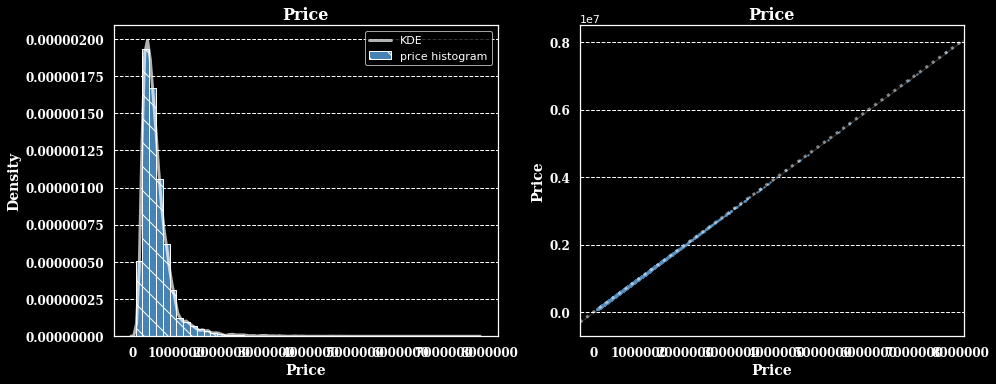

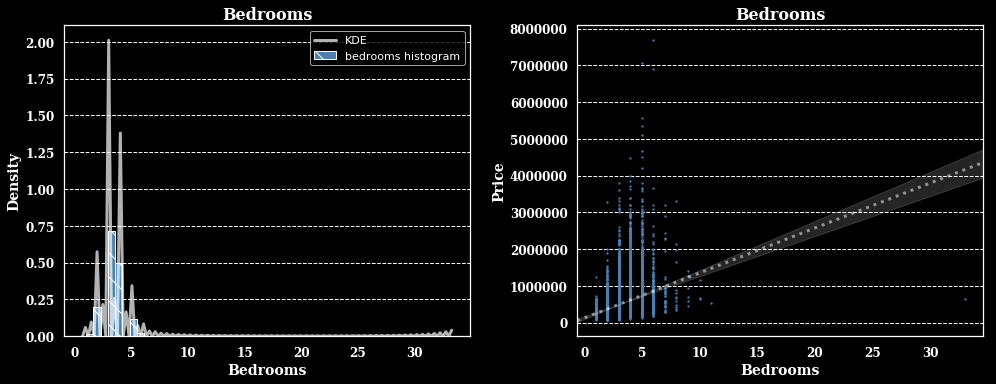

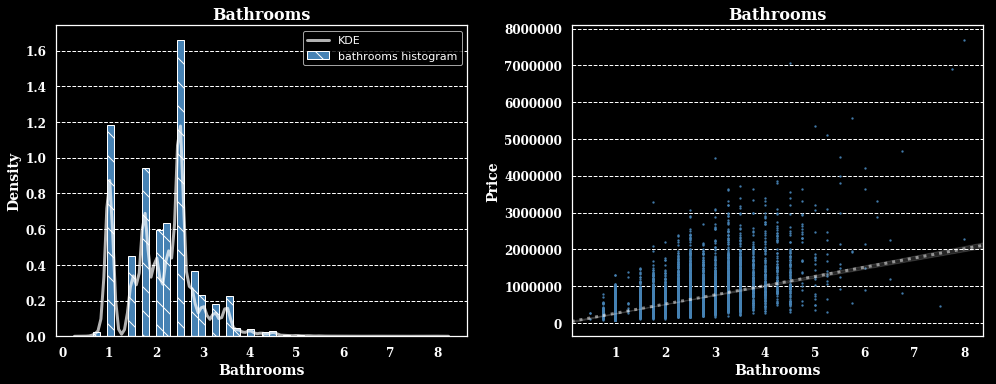

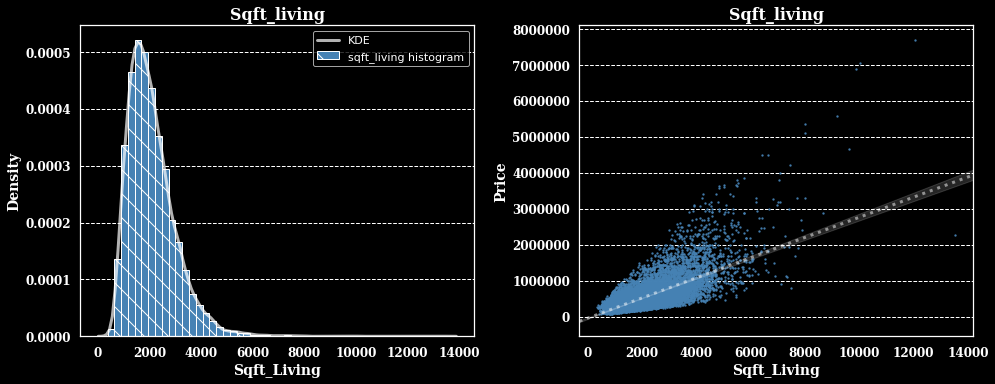

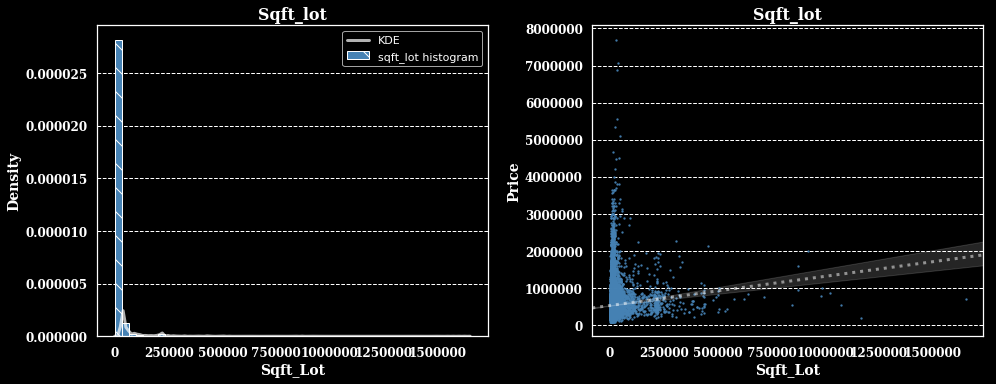

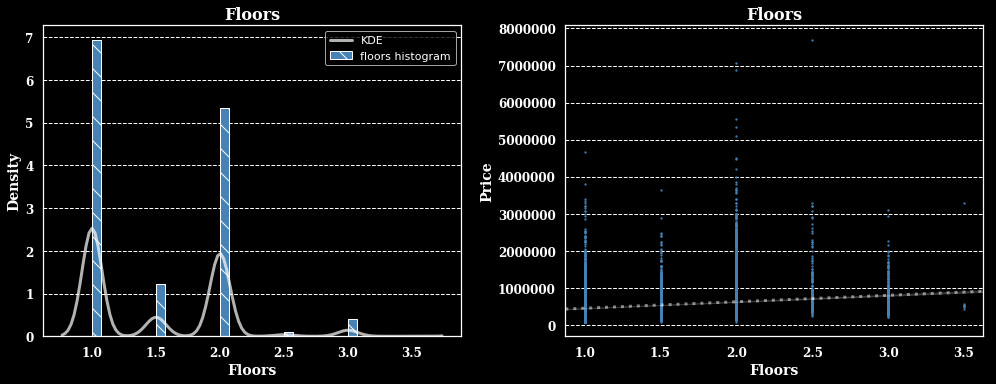

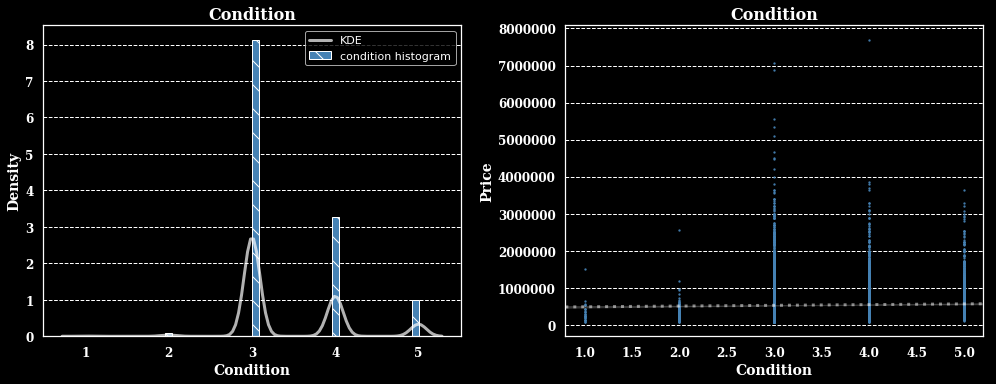

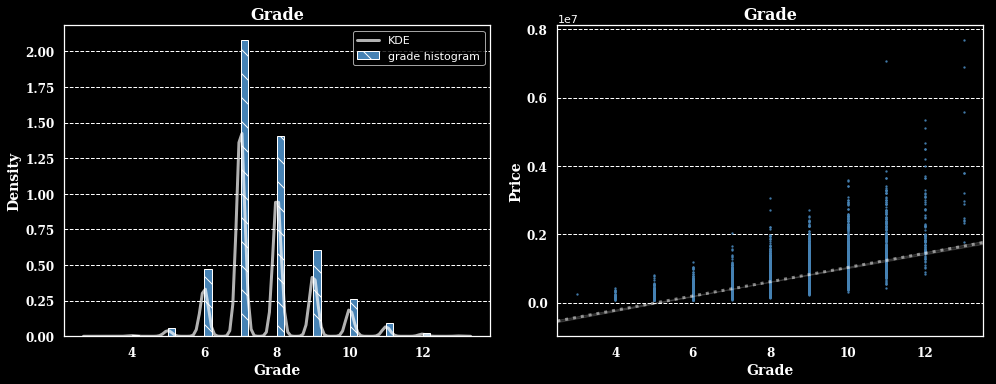

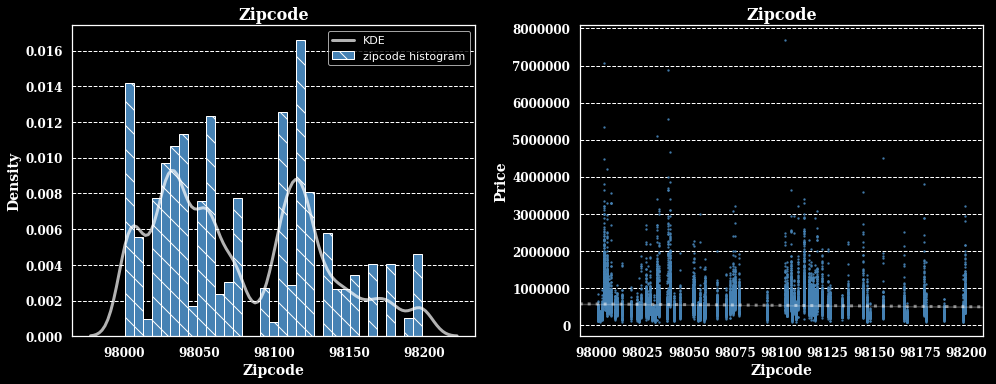

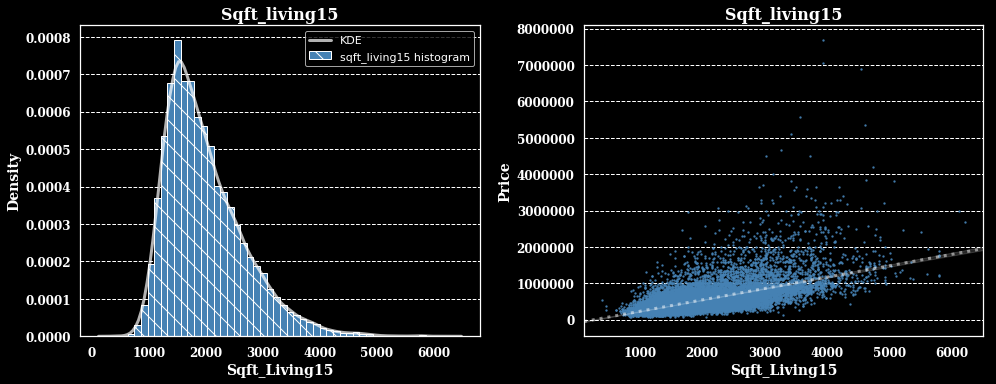

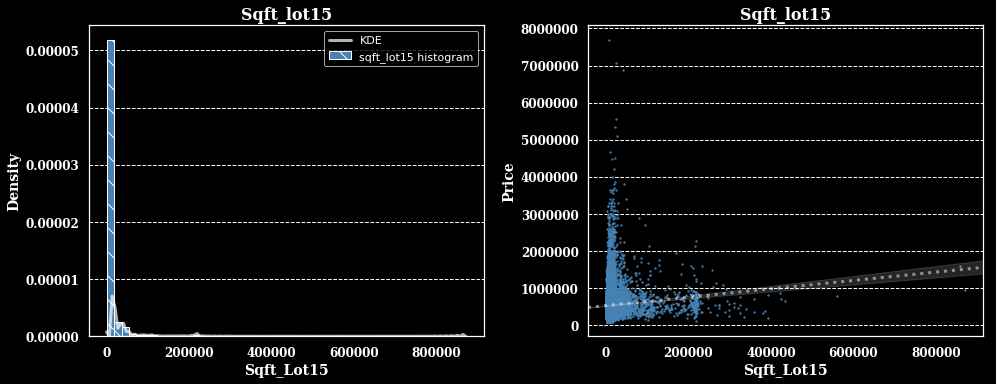

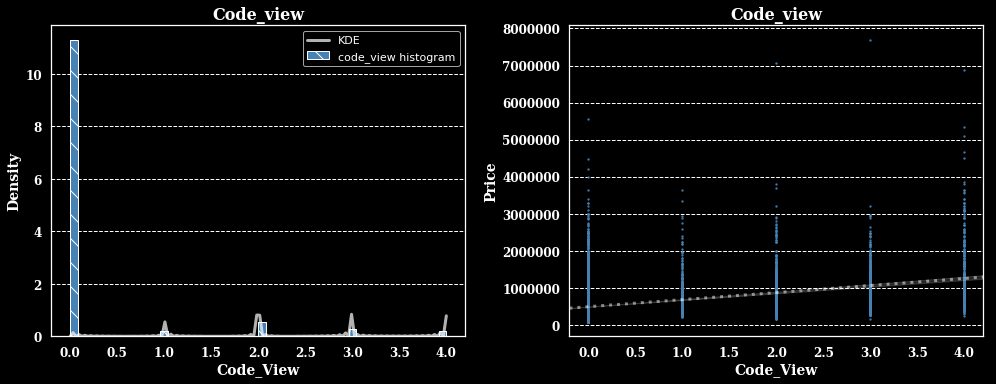

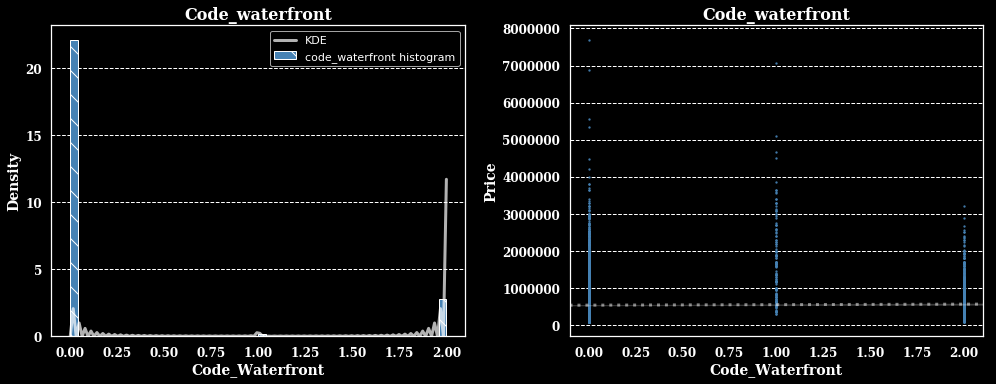

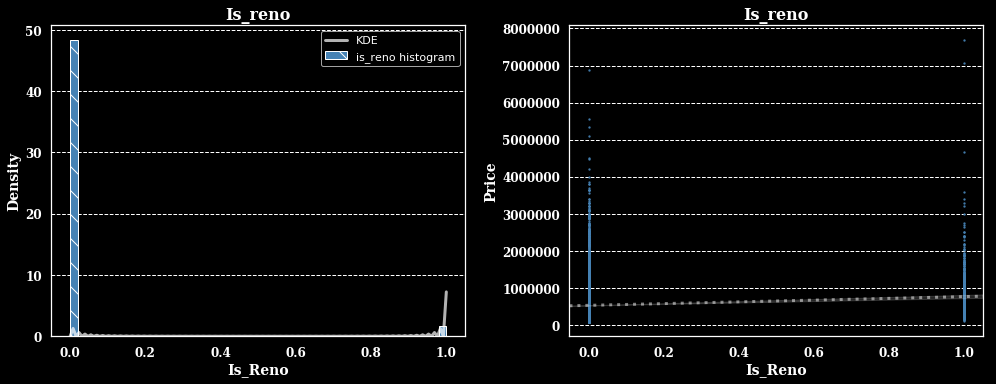

In [38]:
# df_plot = df_coded[['zodiac','condom','sexfreq','age']]
plot_hist_scat(df_plot.drop('Unnamed: 0',axis=1), target='price')

In [31]:
# Multiplot for Multicollinearity
fig = multiplot2(df_coded,fig_size=(30,30),anot=False)

TypeError: ignored

## Yesterday's Processing

### Encoding Results / Errors

- cosei10 is bad and has weird double -1 groups that throw an erorr
- size also triggered an error

In [0]:
check_column(df['size'],nlargest=5)

In [0]:
lablib = LabelLibrary()
lablib.fit(df,['size'])

In [0]:
stop
lib.index['zodiac'].classes_

In [0]:
lib.index['condom'].classes_

In [0]:
lib.inverse_transform(test)

In [0]:
lib2.inverse_transform()

# Edting Code (class LabelLibrary())

In [0]:
# class LabelLibrary():
#     """A Multi-column version of sklearn LabelEncoder, which fits a LabelEncoder
#    to each column of a df and stores it in the index dictionary where
#    .index[keyword=colname] returns the fit encoder object for that column.

#    Example:
#    lib =LabelLibrary()

#    # Be default, lib will fit all columns.
#    lib.fit(df)
#    # Can also specify columns
#    lib.fit(df,columns=['A','B'])

#    # Can then transform
#    df_coded = lib.transform(df,['A','B'])
#    # Can also use fit_transform
#    df_coded = lib.fit_transform(df,columns=['A','B'])

#    # lib.index contains each col's encoder by col name:
#    col_a_classes = lib.index('A').classes_

#    """

#     def __init__(self):#,df,features):
#         self.index = {}
#         from sklearn.preprocessing import LabelEncoder as encoder
#         self.encoder=encoder
#         # self. = df
#         # self.features = features



#     def fit(self,df,columns=None):


#         if columns==None:
#             columns = df.columns
# #             if any(df.isna()) == True:
# #                 num_null = sum(df.isna().sum())
# #                 print(f'Replacing {num_null}# of null values with "NaN".')
# #                 df.fillna('NaN',inplace=True)


#         for col in columns:

#             if any(df[col].isna()):
#                 num_null = df[col].isna().sum()
#                 print(f'For {col}: Replacing {num_null} null values with "NaN".')
#                 df[col].fillna('NaN',inplace=True)

#             # make the encoder
#             col_encoder = self.encoder()

#             #fit with label encoder
#             self.index[col] = col_encoder.fit(df[col])


#     def transform(self,df, columns=None):
#         df_coded = pd.DataFrame()

#         if columns==None:
#             df_columns=df.columns
#             columns = df_columns
#         else:
#             df_columns = df.columns


#         for dfcol in df_columns:
#             if dfcol in columns:
#                 fit_enc = self.index[dfcol]
#                 df_coded[dfcol] = fit_enc.transform(df[dfcol])
#             else:
#                 df_coded[dfcol] = df[dfcol]
#         return df_coded

#     def fit_transform(self,df,columns=None):
#         self.fit(df,columns)
#         df_coded = self.transform(df,columns)
#         return df_coded

#     def inverse_transform(self,df,columns = None):

#         df_reverted = pd.DataFrame()

#         if columns==None:
#             columns=df.columns

#         for col in columns:
#             fit_enc = self.index[col]
#             df_reverted[col] = fit_enc.inverse_transform(df[col])
#         return df_reverted



In [0]:
def multiplot2(df,annot=True,fig_size=None):
    """EDA: Plots results from df.corr() in a correlation heat map for multicollinearity.
    Returns fig, ax objects"""
    import seaborn as sns
    sns.set(style="white")
    from string import ascii_letters
    import numpy as np
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt


    # Compute the correlation matrix
    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    if fig_size==None:
        figsize=(16,16)
    else:
        figsize = fig_size

    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, annot=annot, cmap=cmap, center=0,

    square=True, linewidths=.5, cbar_kws={"shrink": .5})
    return f, ax